In [113]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
# import time
# import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("fivethirtyeight")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# IMPORT DATA

In [114]:
# File path for the CSV Files
idahoFireWeather = os.path.join("..", "Data", "fires_Idaho_XY_TEST.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_df = pd.read_csv(idahoFireWeather)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [115]:
# Convert date to datetime format
idaho_Fire_Weather_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_df['DISCOVERY_DATE_CONVERTED'])

# View the Data in the Dataframe
print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_df

Index(['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED', 'CITY', 'COUNTY_NAME'], dtype='object')


FIRE_SIZE_CLASS DISCOVERY_DATE_CONVERTED       CITY COUNTY_NAME
0                   A               2005-07-16    rexburg     Fremont
1                   A               2005-07-02  pocatello     Bannock
2                   A               2005-07-04  pocatello     Bannock
3                   A               2005-07-04  pocatello     Bannock
4                   A               2005-07-07  pocatello     Bannock
...               ...                      ...        ...         ...
16522               B               2015-10-06     hayden    Kootenai
16523               A               2015-10-11    creston    Boundary
16524               A               2015-10-12  sandpoint    Boundary
16525               A               2015-10-14     emmett      Valley
16526               A               2015-10-17  sandpoint    Boundary

[16527 rows x 4 columns]

## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [116]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["CITY"])
idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["COUNTY_NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
idaho_Fire_Weather_df.isnull().sum()

FIRE_SIZE_CLASS             0
DISCOVERY_DATE_CONVERTED    0
CITY_ammon                  0
CITY_blackfoot              0
CITY_bozeman                0
                           ..
COUNTY_NAME_Shoshone        0
COUNTY_NAME_Teton           0
COUNTY_NAME_Twin Falls      0
COUNTY_NAME_Valley          0
COUNTY_NAME_Washington      0
Length: 83, dtype: int64

In [117]:
# Get dummy variables for nominal property column
clean_fires_Idaho_2000_2015_df = pd.get_dummies(fires_Idaho_2000_2015_df, columns=["STAT_CAUSE_DESCR"])
clean_fires_Idaho_2000_2015_df = pd.get_dummies(fires_Idaho_2000_2015_df, columns=["COUNTY_NAME"])

FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# replace values in each column according to the dictionaries above
clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
clean_fires_Idaho_2000_2015_df.isnull().sum()

FIRE_YEAR                   0
STAT_CAUSE_DESCR            0
FIRE_SIZE                   0
FIRE_SIZE_CLASS             0
LATITUDE                    0
LONGITUDE                   0
DISCOVERY_DATE_CONVERTED    0
CONT_DATE_CONVERTED         0
FIRE_DAYS                   0
COUNTY_NAME_Ada             0
COUNTY_NAME_Adams           0
COUNTY_NAME_Bannock         0
COUNTY_NAME_Bear Lake       0
COUNTY_NAME_Benewah         0
COUNTY_NAME_Bingham         0
COUNTY_NAME_Blaine          0
COUNTY_NAME_Boise           0
COUNTY_NAME_Bonner          0
COUNTY_NAME_Bonneville      0
COUNTY_NAME_Boundary        0
COUNTY_NAME_Butte           0
COUNTY_NAME_Camas           0
COUNTY_NAME_Canyon          0
COUNTY_NAME_Caribou         0
COUNTY_NAME_Cassia          0
COUNTY_NAME_Clark           0
COUNTY_NAME_Clearwater      0
COUNTY_NAME_Custer          0
COUNTY_NAME_Elmore          0
COUNTY_NAME_Franklin        0
COUNTY_NAME_Fremont         0
COUNTY_NAME_Gem             0
COUNTY_NAME_Gooding         0
COUNTY_NAM

### Generate and associate cities using the lat lng coordinates

# MODELING

In [118]:
idaho_Fire_Weather_df

FIRE_SIZE_CLASS DISCOVERY_DATE_CONVERTED  CITY_ammon  CITY_blackfoot  \
0                   A               2005-07-16           0               0   
1                   A               2005-07-02           0               0   
2                   A               2005-07-04           0               0   
3                   A               2005-07-04           0               0   
4                   A               2005-07-07           0               0   
...               ...                      ...         ...             ...   
16522               B               2015-10-06           0               0   
16523               A               2015-10-11           0               0   
16524               A               2015-10-12           0               0   
16525               A               2015-10-14           0               0   
16526               A               2015-10-17           0               0   

       CITY_bozeman  CITY_brigham city  CITY_burley  CITY_caldwell  \
0                 0                  0            0              0   
1                 0                  0            0              0   
2                 0                  0            0              0   
3                 0                  0            0              0   
4                 0                  0            0              0   
...             ...                ...          ...            ...   
16522             0                  0            0              0   
16523             0                  0            0              0   
16524             0                  0            0              0   
16525             0                  0            0              0   
16526             0                  0            0              0   

       CITY_chubbuck  CITY_creston  ...  COUNTY_NAME_Nez Perce  \
0                  0             0  ...                      0   
1                  0             0  ...                      0   
2                  0             0  ...                      0   
3                  0             0  ...                      0   
4                  0             0  ...                      0   
...              ...           ...  ...                    ...   
16522              0             0  ...                      0   
16523              0             1  ...                      0   
16524              0             0  ...                      0   
16525              0             0  ...                      0   
16526              0             0  ...                      0   

       COUNTY_NAME_Oneida  COUNTY_NAME_Owyhee  COUNTY_NAME_Payette  \
0                       0                   0                    0   
1                       0                   0                    0   
2                       0                   0                    0   
3                       0                   0                    0   
4                       0                   0                    0   
...                   ...                 ...                  ...   
16522                   0                   0                    0   
16523                   0                   0                    0   
16524                   0                   0                    0   
16525                   0                   0                    0   
16526                   0                   0                    0   

       COUNTY_NAME_Power  COUNTY_NAME_Shoshone  COUNTY_NAME_Teton  \
0                      0                     0                  0   
1                      0                     0                  0   
2                      0                     0                  0   
3                      0                     0                  0   
4                      0                     0                  0   
...                  ...                   ...                ...   
16522                  0                     0                  0   
16523                  0                  

## CREATING A NEURAL NETWORK MODELING

In [119]:
# CREATE X VALUES
X = idaho_Fire_Weather_df.drop(['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED'], axis=1)
print(X.keys())
X = X.values.reshape(-1, 81)

# X = X.to_numpy()

print(X.shape)
type(X)
X

# fires_Idaho_2000_2015_df

Index(['CITY_ammon', 'CITY_blackfoot', 'CITY_bozeman', 'CITY_brigham city',
       'CITY_burley', 'CITY_caldwell', 'CITY_chubbuck', 'CITY_creston',
       'CITY_dillon', 'CITY_eagle', 'CITY_emmett', 'CITY_garden city',
       'CITY_hailey', 'CITY_hamilton', 'CITY_hayden', 'CITY_idaho falls',
       'CITY_jackson', 'CITY_jerome', 'CITY_kuna', 'CITY_lewiston',
       'CITY_moscow', 'CITY_mountain home', 'CITY_nampa', 'CITY_ontario',
       'CITY_orchard homes', 'CITY_payette', 'CITY_pocatello', 'CITY_polson',
       'CITY_post falls', 'CITY_preston', 'CITY_rathdrum', 'CITY_rexburg',
       'CITY_rupert', 'CITY_salmo', 'CITY_sandpoint', 'CITY_twin falls',
       'CITY_weiser', 'COUNTY_NAME_Ada', 'COUNTY_NAME_Adams',
       'COUNTY_NAME_Bannock', 'COUNTY_NAME_Bear Lake', 'COUNTY_NAME_Benewah',
       'COUNTY_NAME_Bingham', 'COUNTY_NAME_Blaine', 'COUNTY_NAME_Boise',
       'COUNTY_NAME_Bonner', 'COUNTY_NAME_Bonneville', 'COUNTY_NAME_Boundary',
       'COUNTY_NAME_Butte', 'COUNTY_NAME_Camas'

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [120]:
# location_df# CREATE y VALUES
y = idaho_Fire_Weather_df[['FIRE_SIZE_CLASS']]

# y = y.values.reshape(-1, 1)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## TEST AND TRIAN SPLITS

In [121]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [122]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [123]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [124]:
# Inputs
X_train_scaled.shape

(12395, 48)

In [125]:
# Inputs
y_train_categorical.shape

(12395, 7)

In [126]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense

fire_model_v1 = Sequential()
fire_model_v1.add(Dense(units=10, activation='sigmoid', input_dim=48))
fire_model_v1.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                490       
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 77        
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________


In [127]:
## Compile and train the deep learning model
fire_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_model_v1.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
388/388 - 1s - loss: 1.3683 - accuracy: 0.5121
Epoch 2/1000
388/388 - 0s - loss: 1.1877 - accuracy: 0.5441
Epoch 3/1000
388/388 - 0s - loss: 1.1590 - accuracy: 0.5561
Epoch 4/1000
388/388 - 0s - loss: 1.1476 - accuracy: 0.5570
Epoch 5/1000
388/388 - 0s - loss: 1.1416 - accuracy: 0.5580
Epoch 6/1000
388/388 - 0s - loss: 1.1381 - accuracy: 0.5560
Epoch 7/1000
388/388 - 0s - loss: 1.1353 - accuracy: 0.5580
Epoch 8/1000
388/388 - 0s - loss: 1.1329 - accuracy: 0.5562
Epoch 9/1000
388/388 - 0s - loss: 1.1310 - accuracy: 0.5585
Epoch 10/1000
388/388 - 0s - loss: 1.1293 - accuracy: 0.5580
Epoch 11/1000
388/388 - 0s - loss: 1.1275 - accuracy: 0.5571
Epoch 12/1000
388/388 - 0s - loss: 1.1260 - accuracy: 0.5580
Epoch 13/1000
388/388 - 0s - loss: 1.1244 - accuracy: 0.5594
Epoch 14/1000
388/388 - 0s - loss: 1.1230 - accuracy: 0.5597
Epoch 15/1000
388/388 - 0s - loss: 1.1217 - accuracy: 0.5597
Epoch 16/1000
388/388 - 0s - loss: 1.1203 - accuracy: 0.5604
Epoch 17/1000
388/388 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

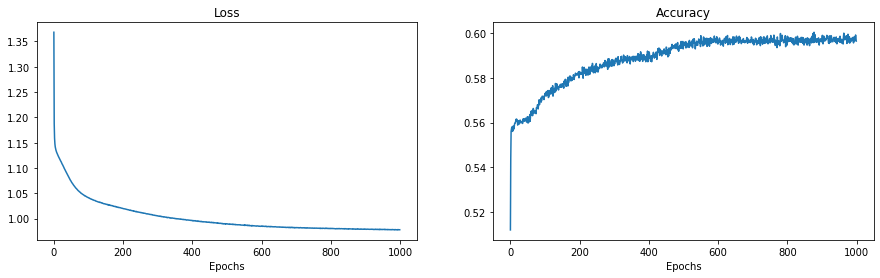

In [128]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

In [129]:
# Deep neural network with X inputs, 2 hidden layers, 10 nodes in each hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense

fire_model_v2 = Sequential()
fire_model_v2.add(Dense(units=10, activation='sigmoid', input_dim=48))
fire_model_v2.add(Dense(units=10, activation='sigmoid'))
fire_model_v2.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                490       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 77        
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [130]:
## Compile and train the deep learning model
fire_model_v2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v2 = fire_model_v2.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
388/388 - 1s - loss: 1.4139 - accuracy: 0.4871
Epoch 2/1000
388/388 - 0s - loss: 1.2319 - accuracy: 0.5241
Epoch 3/1000
388/388 - 0s - loss: 1.1923 - accuracy: 0.5530
Epoch 4/1000
388/388 - 0s - loss: 1.1725 - accuracy: 0.5569
Epoch 5/1000
388/388 - 0s - loss: 1.1609 - accuracy: 0.5572
Epoch 6/1000
388/388 - 0s - loss: 1.1525 - accuracy: 0.5558
Epoch 7/1000
388/388 - 0s - loss: 1.1473 - accuracy: 0.5553
Epoch 8/1000
388/388 - 0s - loss: 1.1425 - accuracy: 0.5536
Epoch 9/1000
388/388 - 0s - loss: 1.1392 - accuracy: 0.5548
Epoch 10/1000
388/388 - 0s - loss: 1.1364 - accuracy: 0.5546
Epoch 11/1000
388/388 - 0s - loss: 1.1333 - accuracy: 0.5554
Epoch 12/1000
388/388 - 0s - loss: 1.1310 - accuracy: 0.5551
Epoch 13/1000
388/388 - 0s - loss: 1.1286 - accuracy: 0.5547
Epoch 14/1000
388/388 - 0s - loss: 1.1265 - accuracy: 0.5552
Epoch 15/1000
388/388 - 0s - loss: 1.1243 - accuracy: 0.5532
Epoch 16/1000
388/388 - 0s - loss: 1.1222 - accuracy: 0.5549
Epoch 17/1000
388/388 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

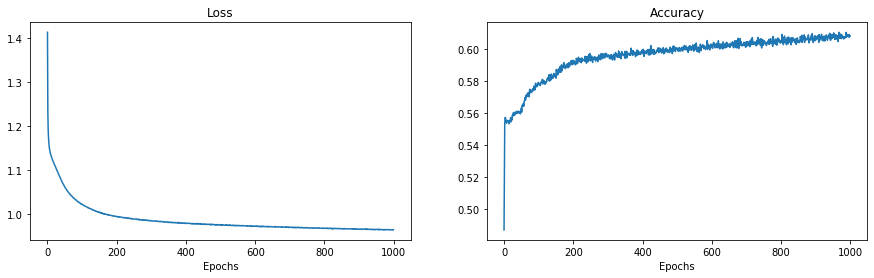

In [131]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v2.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v2.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

In [132]:
fire_model_v1, fire_model_v1 = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {fire_model_v1_loss}, Accuracy: {model_accuracy}")

fire_model_v2, fire_model_v2 = fire_model_v2.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {fire_model_v2_loss}, Accuracy: {deep_model_accuracy}")

130/130 - 0s - loss: 1.0253 - accuracy: 0.5787


NameError: name 'fire_model_v1_loss' is not defined